# Nettoyage du dataset

## 1/ Import des librairies et chargement des données

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = 162
pd.options.display.max_rows = 162

raw_data = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t', low_memory=False)

## 2/ Observation globale du jeu de données brut

In [2]:
raw_data.shape

(320772, 162)

In [3]:
raw_data.sample(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
153648,0820581153199,http://world-fr.openfoodfacts.org/produit/0820...,usda-ndb-import,1489075605,2017-03-09T16:06:45Z,1489075605,2017-03-09T16:06:45Z,"Bella Maria, Valencia Almonds, Fine Herbs",NaN,NaN,NaN,NaN,Russell Mccall's Inc.,russell-mccall-s-inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Blanched valencia almonds, sunflower oil, spic...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ blanched-valencia-almonds -> en:blanched-va...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,c,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,2389.0,NaN,42.86,3.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000,21.43,3.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.7,21.43,NaN,NaN,NaN,0.81534,0.321,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.286,NaN,0.00386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,NaN,NaN
168877,0872447000857,http://world-fr.openfoodfacts.org/produit/0872...,usda-ndb-import,1489092204,2017-03-09T20:43:24Z,1489092204,2017-03-09T20:43:24Z,Panettone,NaN,NaN,NaN,NaN,Granducale,granducale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [4]:
raw_data.describe(include='all')

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,320749,320749,320770,320769,320763,320772,320772,303010,52795,104819,78960,78961,292360,292352,84410,84389,84411,22190,22153,36501,36495,46559,46644,46666,29306,29303,18803,23,20320,58193,51722,320492,320492,320492,248962,28344,19,24353,24329,24352,211331,0.0,248939.000000,248905,154680,154680,248939.000000,0.0,4835,248939.000000,0.0,11696,0.0,221210,91513,94491,320726,320726,320726,84366,84366,75836,75836,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,414.000000,200886.000000,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268

## 3/ Sélection des produits vendus en France

In [5]:
raw_data['countries_fr'].value_counts()

États-Unis                                                                                             172998
France                                                                                                  94392
Suisse                                                                                                  14953
Allemagne                                                                                                7870
Espagne                                                                                                  5009
Royaume-Uni                                                                                              4825
Belgique                                                                                                 2595
Australie                                                                                                2056
Russie                                                                                                   1315
France,Sui

In [6]:
mask = raw_data['countries_fr'].str.contains('France', na=False)

df = raw_data[mask].drop(['countries', 'countries_tags', 'countries_fr'], axis=1)
df.shape

(98440, 159)

## 4/ Suppression des features avec plus de 60% de valeurs manquantes

In [7]:
# Afficher le nombre de valeurs manquantes pour chaque colonne
df.apply(lambda x: sum(x.isnull()), axis=0)

code                                              0
url                                               0
creator                                           0
created_t                                         0
created_datetime                                  1
last_modified_t                                   0
last_modified_datetime                            0
product_name                                   7193
generic_name                                  60149
quantity                                      27203
packaging                                     39469
packaging_tags                                39469
brands                                        12014
brands_tags                                   12018
categories                                    36485
categories_tags                               36485
categories_fr                                 36485
origins                                       83104
origins_tags                                  83113
manufacturin

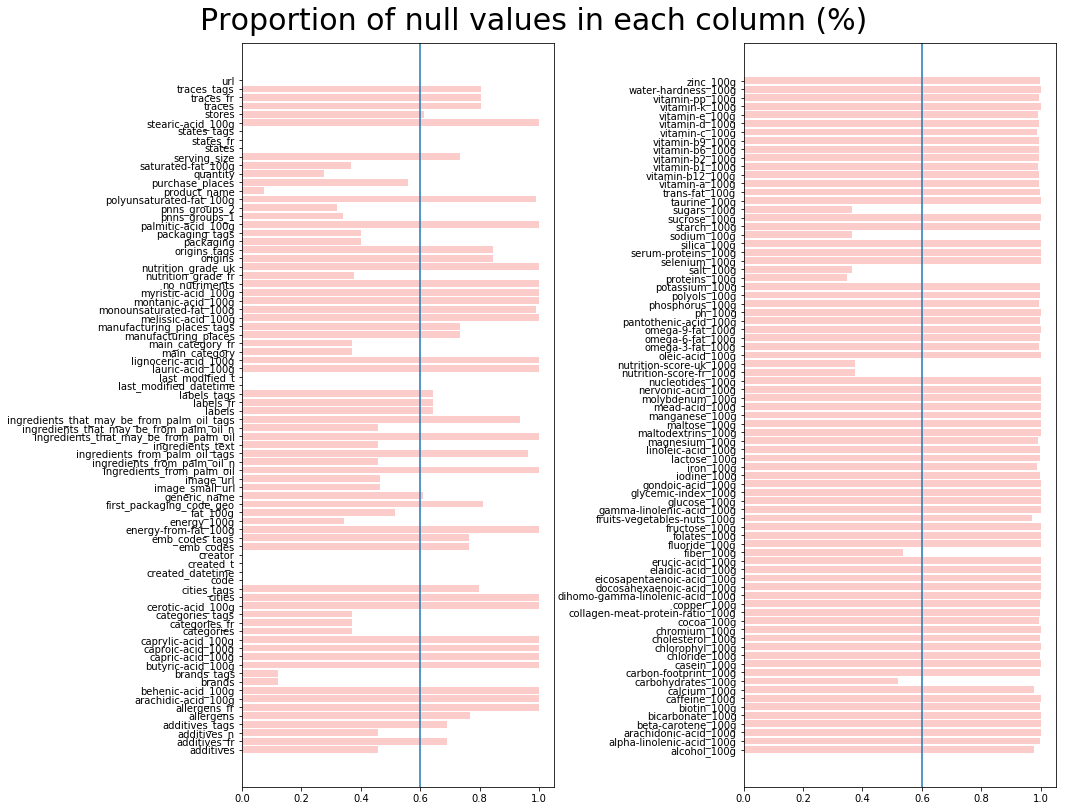

In [79]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 12))
fig.suptitle("Proportion of null values in each column (%)", size=30)

count = df.isnull().mean(axis=0)
ax1.barh(y=count[:80].index, width=count[:80].values, color='#FB9A99', alpha=0.5)
ax1.axvline(x=0.6)
ax2.barh(y=count[80:].index, width=count[80:].values, color='#FB9A99', alpha=0.5)
ax2.axvline(x=0.6)

plt.tight_layout(w_pad=0,pad=5)
plt.show()

Beaucoup de features ont un nombre important de valeurs manquantes. Ces features n'apportant alors pas beaucoup d'informations, nous allons supprimer toutes celles qui ont plus de 60% de valeurs manquantes.

In [10]:
threshold = 0.4 * df.shape[0]

df2 = df.dropna(axis=1, thresh=threshold)

In [11]:
print(df2.columns)
df2.shape

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_fr', 'purchase_places',
       'ingredients_text', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr', 'image_url', 'image_small_url',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g'],
      dtype='object')


(98440, 43)

## 5/ Suppression des features sans intérêt pour l'analyse

In [12]:
df3 = df2.drop(['code', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime',
                'quantity', 'packaging', 'packaging_tags', 'purchase_places', 'additives_n', 'additives', 
                'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'states', 
                'states_tags', 'states_fr', 'image_url', 'image_small_url'], axis=1)
df3.shape

(98440, 24)

## 6/ Conversion de la valeur énergétique en calories

In [13]:
df3['energy_100g'] = df3['energy_100g'] / 4.184

## 7/ Traitement des valeurs manquantes

In [14]:
# Afficher le nombre de valeurs manquantes par colonne
df3.apply(lambda x: sum(x.isnull()), axis=0)

url                            0
product_name                7193
brands                     12014
brands_tags                12018
categories                 36485
categories_tags            36485
categories_fr              36485
ingredients_text           44974
nutrition_grade_fr         37025
pnns_groups_1              33559
pnns_groups_2              31402
main_category              36485
main_category_fr           36485
energy_100g                33847
fat_100g                   50798
saturated-fat_100g         36065
carbohydrates_100g         51229
sugars_100g                35925
fiber_100g                 52717
proteins_100g              34122
salt_100g                  35866
sodium_100g                35869
nutrition-score-fr_100g    37025
nutrition-score-uk_100g    37025
dtype: int64

In [15]:
df4 = df3.dropna(subset=['product_name', 'energy_100g', 'nutrition-score-fr_100g'])
df4.shape

(60992, 24)

In [16]:
# Afficher le nombre de valeurs manquantes par colonne
df4.apply(lambda x: sum(x.isnull()), axis=0)

url                            0
product_name                   0
brands                       210
brands_tags                  210
categories                 16687
categories_tags            16687
categories_fr              16687
ingredients_text           20133
nutrition_grade_fr             0
pnns_groups_1              14168
pnns_groups_2              14077
main_category              16687
main_category_fr           16687
energy_100g                    0
fat_100g                   17109
saturated-fat_100g             0
carbohydrates_100g         17161
sugars_100g                    0
fiber_100g                 16414
proteins_100g                  0
salt_100g                      0
sodium_100g                    0
nutrition-score-fr_100g        0
nutrition-score-uk_100g        0
dtype: int64

In [17]:
# Remplacement des valeurs restantes
df5 = df4.fillna(np.NaN)
df5.shape

(60992, 24)

## 8/ Traitement des valeurs aberrantes (outliers)

In [18]:
df5.describe(include='all')

,url,product_name,brands,brands_tags,categories,categories_tags,categories_fr,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,60992,60992,60782,60782,44305,44305,44305,40859,60992,46824,46915,44305,44305,60992.000000,43883.000000,60992.000000,43831.000000,60992.000000,44578.000000,60992.000000,60992.000000,60992.000000,60992.000000,60992.000000
unique,60992,51066,12732,9973,19464,11612,11612,38257,5,13,40,1009,1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,http://world-fr.openfoodfacts.org/produit/3273...,Mayonnaise,Carrefour,carrefour,"Snacks sucrés,Biscuits et gâteaux,Biscuits","en:sugary-snacks,en:biscuits-and-cakes,en:bisc...","Snacks sucrés,Biscuits et gâteaux,Biscuits",Semoule de _blé_ dur de qualité supérieure.,d,Sugary snacks,unknown,en:beverages,Boissons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,43,2313,2354,259,488,488,102,16907,7362,6961,1647,1647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,282.173547,13.334119,5.439707,27.787834,13.389663,2.542348,7.748720,1.082642,0.426237,8.690107,8.369180
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3156.082346,16.767690,8.561807,27.275458,19.020091,4.621375,7.845984,3.815873,1.502264,9.044649,9.384286
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,-15.000000,-15.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.967495,1.400000,0.300000,4.100000,1.000000,0.000000,1.900000,0.080000,0.031496,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248.804971,7.000000,2.000000,14.800000,4.000000,1.300000,6.000000,0.551180,0.217000,9.000000,7.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396.749522,21.000000,7.400000,53.000000,17.870000,3.200000,10.900000,1.230000,0.484252,15.000000,16.000000


In [19]:
# Suppression si energy_100g > 900 calories 
# car les lipides sont les nutriments les plus denses et 100g de lipides = 900 calories
df6 = df5.drop(df5[df5.energy_100g > 900].index)

# Suppression si valeurs nutritionnelles (pour 100g) > 100g ou < 0g
for col in df6.columns[14:-2]:
    df6.drop(df6[(df6[col] > 100) | (df6[col] < 0)].index, inplace=True)
    
# Suppresion si somme des glucides + lipides + protéines + sel pour 100g > 100g (à 10% près)
df6['temp'] = (df6[['fat_100g', 'saturated-fat_100g']].fillna(0).max(axis=1) 
               + df6[['carbohydrates_100g', 'sugars_100g']].fillna(0).max(axis=1)
               + df6['proteins_100g'].fillna(0) 
               + df6['fiber_100g'].fillna(0) 
               + df6['salt_100g'].fillna(0))
df6.drop(df6[df6['temp'] > 110].index, inplace=True)

# Suppression si calories < lipides*9 + (glucides+proteines)*4 + fibres*1.9 (à 10% près)
df6['temp'] = (9*df6['fat_100g'].fillna(0)
               + 4*(df6['carbohydrates_100g'].fillna(0) + df6['proteins_100g'].fillna(0)) 
               + 1.9*df6['fiber_100g'].fillna(0))
df6.drop(df6[df6['temp'] > 1.1 * df6['energy_100g']].index, inplace=True)

# Suppression si calories > lipides*9 + (glucides+proteines)*4 + fibres*1.9 (à 10% près)
# SI toutes les infos sur les nutriments sont dispos
mask = (~(df6['fat_100g'].isnull() 
          | df6['carbohydrates_100g'].isnull() 
          | df6['fiber_100g'].isnull()) 
        & (df6['energy_100g'] > 1.1 * df6['temp']))
df6.drop(df6[mask].index, inplace=True) 
df6.drop(['temp'], axis=1, inplace=True)

df6.shape

(58715, 24)

## 9/ Traitement des colonnes semblables

### a/ Catégories d'un produit

Il s'agit des colonnes: 'categories', 'categories_tags', 'categories_fr', 'pnns_groups_1', 'pnns_groups_2', 'main_category' et 'main_category_fr'

In [20]:
categories = df6[['categories', 'categories_tags', 'categories_fr', 
                 'pnns_groups_1', 'pnns_groups_2', 'main_category', 'main_category_fr']]

In [21]:
print("Nombre de catégories différentes:")
for col in categories:
    print(f"{col} : {len(categories[col].value_counts())}")

Nombre de catégories différentes:
categories : 18816
categories_tags : 11257
categories_fr : 11257
pnns_groups_1 : 13
pnns_groups_2 : 40
main_category : 955
main_category_fr : 955


'pnns_groups_1' semble être le meilleur choix avec un nombre de catégories plus réduit, ce qui permettra éventuellement de faire des analyses dessus.

In [22]:
df6['pnns_groups_1'].value_counts()

Sugary snacks              7058
unknown                    6607
Milk and dairy products    5061
Cereals and potatoes       5039
Composite foods            4942
Fish Meat Eggs             4565
Beverages                  3889
Fat and sauces             2657
Fruits and vegetables      2527
Salty snacks               1799
sugary-snacks               373
fruits-and-vegetables       371
cereals-and-potatoes          1
Name: pnns_groups_1, dtype: int64

In [23]:
# Pour harmoniser les catégories
df6['pnns_groups_1'] = df6['pnns_groups_1'].replace(
    'fruits-and-vegetables', 'Fruits and vegetables').replace(
    'sugary-snacks', 'Sugary snacks').replace(
    'cereals-and-potatoes', 'Cereals and potatoes')

In [24]:
df7 = df6.drop(['categories', 'categories_tags', 'categories_fr', 
                'pnns_groups_2', 'main_category', 'main_category_fr'], axis=1)
df7.shape

(58715, 18)

### b/ Entre le sel et le sodium

Normalement il s'agit de la même chose, en effet le sel est du chlorure de sodium, donc 1g de sodium correspond à environ 2,54g de sel.

Corrélation entre 'salt_100g' et 'sodium_100g': 0.9999999966646576


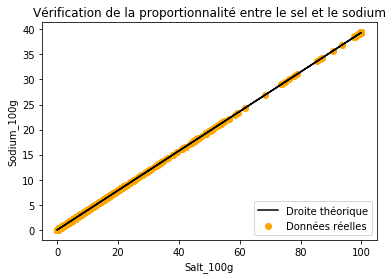

In [29]:
print(f"Corrélation entre 'salt_100g' et 'sodium_100g': {df7['salt_100g'].corr(df7['sodium_100g'])}")

plt.title('Vérification de la proportionnalité entre le sel et le sodium')
plt.scatter(df7['salt_100g'], df7['sodium_100g'], color='orange', label='Données réelles')
plt.plot(df7['salt_100g'], df7['salt_100g'] / 2.54, color='black', label='Droite théorique')
plt.xlabel('Salt_100g')
plt.ylabel('Sodium_100g')
plt.legend(loc='lower right')
plt.show()

In [30]:
df8 = df7.drop(['sodium_100g'], axis=1)
df8.shape

(58715, 17)

### c/ Entre les scores nutritionnels FR et UK

Il existe deux colonnes: 'nutrition-score-fr_100g' et 'nutrition-score-uk_100g' qui sont très proches mais utilisent un barème un peu différent.

In [31]:
mask = df8['nutrition-score-fr_100g'] == df8['nutrition-score-uk_100g']

print(f"Les 2 scores sont identiques dans "
      f"{len(df8[mask])/df8.shape[0]*100:.2f}% des cas")

Les 2 scores sont identiques dans 89.81% des cas


En fait le barème est différent pour les boissons, les fromages et les matières grasses. Nous pouvons le vérifier:

In [32]:
df8[~mask]['pnns_groups_1'].value_counts()

Beverages                  3480
Milk and dairy products    1973
Fat and sauces              485
Composite foods               6
unknown                       6
Salty snacks                  1
Name: pnns_groups_1, dtype: int64

Le score nutritionnel français étant plus adapté au marché français, nous conserverons celui-là.

In [33]:
df9 = df8.drop(['nutrition-score-uk_100g'], axis=1)
df9.shape

(58715, 16)

### d/ Entre brands et brands_tags

In [34]:
df9[['brands', 'brands_tags']].sample(10)

,brands,brands_tags
314001,Maizena,maizena
257549,Ehrmann,ehrmann
224759,Whaou!,whaou
236126,Dessaint,dessaint
183881,"Sans marque,Sélectionné par nos tripiers,Charal","sans-marque,selectionne-par-nos-tripiers,charal"
235812,Tropicana,tropicana
222386,Salaisons du Mâconnais,salaisons-du-maconnais
250120,Mont Blanc,mont-blanc
176032,Badoit,badoit
215774,Leader Price,leader-price


In [35]:
print("Nombre de valeurs manquantes:")
for col in ['brands', 'brands_tags']:
    print(f"{col} : {sum(df9[col].isnull())}")

Nombre de valeurs manquantes:
brands : 194
brands_tags : 194


Il s'agit visiblement des deux mêmes colonnes, formatées un peu différemment (sans casse ni espaces pour brands_tags). Nous pouvons n'en garder qu'une sur les deux.

In [36]:
df10 = df9.drop(['brands_tags'], axis=1)
df10.shape

(58715, 15)

## 10/ Sauvegarde du dataset cleané

In [37]:
df10.to_csv('data.csv', index=False)